## Asignment No. 1
### EE 298 Foundations of Machine Learning 
#### Jay Neil Gapuz

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Create the basis vectors

Generate a 16 x 16 - dim position encoding using an interweaved sin(.) and cos(.) functions:

B = {b1,b2,b3,...b16} where bi is a vector with size 16.

In [2]:
def createInterweavedFunc(dim1,dim2):
    '''
    this function will return a matrix with these format:
    [
        [sin(x1),cos(x1),sin(x1)...],
        [cos(x2),sin(x2),cos(x2)...],
        [sin(x3),cos(x3),sin(x3)...],
        [cos(x4),sin(x4),cos(x4)...],
        .
        .
        .      
    ]   
    where x is a list of values from 0 to 2pi
    '''
 
    # Create a domain spanning from 0 to 2pi
    domain_arr = [0]
    n = 0 
    for i in range(dim1-1):
        n = n + math.pi/(dim1/2)
        domain_arr.append(n)
        
    # Generate the vectors    
    arr_sin_cos = []     
    # sin(x) and cos(x) will already produce 2 elements in a list
    dim2 = int(dim2/2)
    for i in range(dim1):
        temp_arr = []
        val = domain_arr[i]
        if i%2 == 0:
            for j in range(dim2):
                temp_arr.append(np.sin(val))
                temp_arr.append(np.cos(val))
        else:
            for j in range(dim2):
                temp_arr.append(np.cos(val))
                temp_arr.append(np.sin(val))
        
        arr_sin_cos.append(temp_arr)
        
    return np.array([arr_sin_cos])
            

Define the parameters to return a 16 x 16 array, then input to the positional encoding function

In [3]:
dim1 = 16
dim2 = 16
outputVecs = createInterweavedFunc(dim1,dim2)

### Check if vectors are orthogonal and orthonormal
A. Let  B  =  {v1, v2, ... , vk} be a set of vectors in Rn, then B is called an orthogonal if 

        vi . vj  =  0
B. An orthogonal set of vectors is called orthonormal if all vectors in S are unit vectors.The magnitude of the vectors should be equal to 1

In [4]:
#We define a function that will check if the basis vectors are orthogonal and orthonormal

def checkIfOrthogonal(v):
    try: v = v.tolist()
    except: pass
    product_vals = []
    for vec in v:
        v_copy = [x for x in v if x != vec]
        # Perform multiplication
        for vec_2 in v_copy:
            result = np.dot(np.array(vec_2),np.array(vec))
            product_vals.append(result)
    #print(product_vals)
    return all(np.abs(i) < 0.000001 for i in product_vals)

def checkIfOrthonormal(v):
    try: v = v.tolist()
    except: pass
    mag_vals = []
    for vec in v: 
        mag_vals.append(math.sqrt(sum(i**2 for i in vec)))
    #print(mag_vals)
    return all(np.abs(i) > 0.999 and np.abs(i) < 1.001 for i in mag_vals)
    

In [5]:
print("Orthogonal", checkIfOrthogonal(outputVecs[0]))
print("Orthonormal", checkIfOrthonormal(outputVecs[0]))

Orthogonal False
Orthonormal False


The resulting vectors are not orthogonal and not orthonormal

### Perfrom Gram–Schmidt process
This will orthogonalize and normalize the vectors

In [6]:
# Pseudo in Matlab available at https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process
def gram_schmidt_func(A):
      
    k = A.shape[0]
    A[:, 0] = A[:, 0]/np.sqrt((A[:, 0]).dot(A[:, 0]))

    for i in range(1, k):
        Ai = A[:, i]
        for j in range(0, i):
            Aj = A[:, j]
            Ai = Ai - Ai.dot(Aj) * Aj
        A[:, i] = Ai /np.sqrt(Ai.dot(Ai))
    
    return A

# Built in function QR decomposition using G-S in numpy
def gs2(v):
    Q,R  = np.linalg.qr(v)
    return Q

In [11]:
# Transform the vecs using G-S method
outputVecs_copy = np.copy(outputVecs)
transformed_output = gs2(outputVecs_copy[0])
# Check if orthogonal and orthonormal
print("Orthogonal", checkIfOrthogonal(transformed_output))
print("Orthonormal", checkIfOrthonormal(transformed_output))

Orthogonal True
Orthonormal True


### Plot the vectors

In [8]:
def plot_vecs(V,dim1,dim2):
    plt.figure(figsize=(12,8))
    plt.pcolormesh(V, cmap='viridis')
    plt.xlabel('Dimensions')
    plt.xlim((0, dim1))
    plt.ylim((dim2,0))
    plt.colorbar()

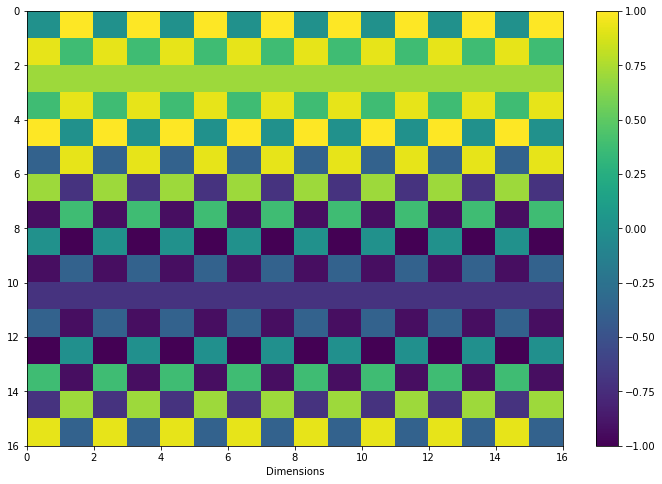

In [9]:
# A. The original vectors
plot_vecs(outputVecs[0],dim1,dim2)

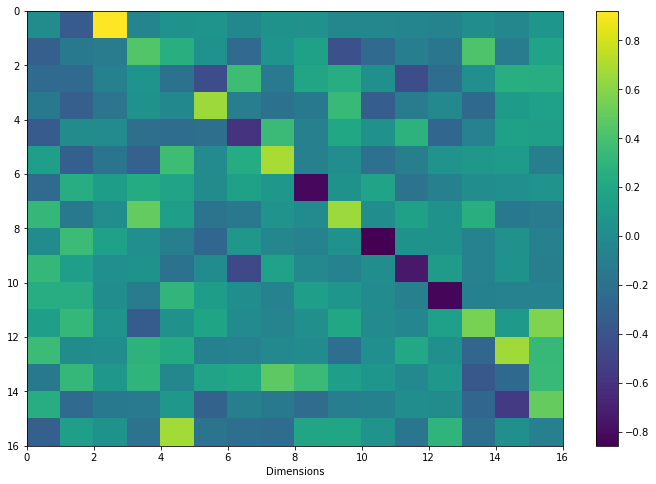

In [10]:
# B. The transformed vectors
plot_vecs(transformed_output,dim1,dim2)